In [12]:
import pandas as pd
import re
import codecs
from functools import reduce
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS, WordCloud

df = pd.read_csv('prog_book.csv')
df

,Rating,Reviews,Book_title,Description,Number_Of_Pages,Type,Price
0,4.17,"3,829",The Elements of Style,This style manual offers practical advice on i...,105,Hardcover,9.323529
1,4.01,"1,406","The Information: A History, a Theory, a Flood","James Gleick, the author of the best sellers C...",527,Hardcover,11.000000
2,3.33,0,Responsive Web Design Overview For Beginners,In Responsive Web Design Overview For Beginner...,50,Kindle Edition,11.267647
3,3.97,"1,658",Ghost in the Wires: My Adventures as the World...,If they were a hall of fame or shame for compu...,393,Hardcover,12.873529
4,4.06,"1,325",How Google Works,Both Eric Schmidt and Jonathan Rosenberg came ...,305,Kindle Edition,13.164706
...,...,...,...,...,...,...,...
266,3.76,0,3D Game Engine Architecture: Engineering Real-...,Dave Eberly's 3D Game Engine Design was the fi...,752,Hardcover,203.108823
267,3.94,22,An Introduction to Database Systems,"Continuing in the eighth edition, An Introduct...",1040,Paperback,212.097059
268,4.49,36,"The Art of Computer Programming, Volumes 1-3 B...",Knuth's classic work has been widely acclaimed...,896,Boxed Set - Hardcover,220.385294
269,4.77,4,"The Art of Computer Programming, Volumes 1-4a ...","""The bible of all fundamental algorithms and t...",3168,Hardcover,220.385294


In [13]:
titles = df['Book_title'] 
titles #출력하여 내용 확인

0                                  The Elements of Style
1          The Information: A History, a Theory, a Flood
2           Responsive Web Design Overview For Beginners
3      Ghost in the Wires: My Adventures as the World...
4                                       How Google Works
                             ...                        
266    3D Game Engine Architecture: Engineering Real-...
267                  An Introduction to Database Systems
268    The Art of Computer Programming, Volumes 1-3 B...
269    The Art of Computer Programming, Volumes 1-4a ...
270                A Discipline for Software Engineering
Name: Book_title, Length: 271, dtype: object

In [14]:
stopWords = set(stopwords.words("english"))


In [15]:
lemma = WordNetLemmatizer()

In [17]:

words = []
for title in titles:
    EnWords = re.sub(r"[^a-zA-Z]+", " ", str(title)) 
    EnWordsToken = word_tokenize(EnWords.lower()) 
    EnWordsTokenStop = [w for w in EnWordsToken if w not in stopWords] 
    EnWordsTokenStopLemma = [lemma.lemmatize(w) for w in EnWordsTokenStop] 
    words.append(EnWordsTokenStopLemma)

In [18]:
print(words)

[['element', 'style'], ['information', 'history', 'theory', 'flood'], ['responsive', 'web', 'design', 'overview', 'beginner'], ['ghost', 'wire', 'adventure', 'world', 'wanted', 'hacker'], ['google', 'work'], ['meme', 'machine'], ['start', 'great', 'leader', 'inspire', 'everyone', 'take', 'action'], ['algorithm', 'live', 'computer', 'science', 'human', 'decision'], ['weapon', 'math', 'destruction', 'big', 'data', 'increase', 'inequality', 'threatens', 'democracy'], ['zx', 'spectrum', 'game', 'code', 'club', 'twenty', 'fun', 'game', 'code', 'learn'], ['sync', 'emerging', 'science', 'spontaneous', 'order'], ['master', 'algorithm', 'quest', 'ultimate', 'learning', 'machine', 'remake', 'world'], ['ship'], ['superintelligence', 'path', 'danger', 'strategy'], ['art', 'start', 'time', 'tested', 'battle', 'hardened', 'guide', 'anyone', 'starting', 'anything'], ['kingpin', 'one', 'hacker', 'took', 'billion', 'dollar', 'cybercrime', 'underground'], ['quark', 'jaguar', 'adventure', 'simple', 'comp

In [19]:
words2 = list(reduce(lambda x, y: x+y, words)) 
print(words2) #출력하여 내용 확인

['element', 'style', 'information', 'history', 'theory', 'flood', 'responsive', 'web', 'design', 'overview', 'beginner', 'ghost', 'wire', 'adventure', 'world', 'wanted', 'hacker', 'google', 'work', 'meme', 'machine', 'start', 'great', 'leader', 'inspire', 'everyone', 'take', 'action', 'algorithm', 'live', 'computer', 'science', 'human', 'decision', 'weapon', 'math', 'destruction', 'big', 'data', 'increase', 'inequality', 'threatens', 'democracy', 'zx', 'spectrum', 'game', 'code', 'club', 'twenty', 'fun', 'game', 'code', 'learn', 'sync', 'emerging', 'science', 'spontaneous', 'order', 'master', 'algorithm', 'quest', 'ultimate', 'learning', 'machine', 'remake', 'world', 'ship', 'superintelligence', 'path', 'danger', 'strategy', 'art', 'start', 'time', 'tested', 'battle', 'hardened', 'guide', 'anyone', 'starting', 'anything', 'kingpin', 'one', 'hacker', 'took', 'billion', 'dollar', 'cybercrime', 'underground', 'quark', 'jaguar', 'adventure', 'simple', 'complex', 'linked', 'everything', 'co

In [22]:
count = Counter(words2)
count

Counter({'element': 5,
         'style': 2,
         'information': 3,
         'history': 1,
         'theory': 9,
         'flood': 1,
         'responsive': 1,
         'web': 5,
         'design': 24,
         'overview': 1,
         'beginner': 8,
         'ghost': 1,
         'wire': 1,
         'adventure': 3,
         'world': 5,
         'wanted': 1,
         'hacker': 5,
         'google': 2,
         'work': 3,
         'meme': 1,
         'machine': 6,
         'start': 2,
         'great': 4,
         'leader': 1,
         'inspire': 1,
         'everyone': 1,
         'take': 1,
         'action': 2,
         'algorithm': 12,
         'live': 2,
         'computer': 26,
         'science': 15,
         'human': 3,
         'decision': 2,
         'weapon': 1,
         'math': 2,
         'destruction': 1,
         'big': 4,
         'data': 13,
         'increase': 1,
         'inequality': 1,
         'threatens': 1,
         'democracy': 1,
         'zx': 1,
         's

In [23]:
word_count = dict()
for tag, counts in count.most_common(50): 
    if(len(str(tag))>1):
        word_count[tag] = counts 
        print("%s : %d" % (tag, counts))

programming : 60
game : 30
computer : 26
design : 24
python : 18
software : 16
introduction : 16
science : 15
data : 13
guide : 13
system : 13
algorithm : 12
application : 12
code : 11
language : 11
pattern : 10
development : 10
object : 10
engineering : 10
theory : 9
learning : 9
beginner : 8
learn : 8
javascript : 8
principle : 8
oriented : 8
practical : 8
gem : 8
way : 7
programmer : 7
machine : 6
architecture : 6
agile : 6
new : 6
approach : 6
functional : 6
test : 6
modern : 6
effective : 6
practice : 6
computation : 6
element : 5
web : 5
world : 5
hacker : 5
art : 5
problem : 5
hidden : 5
technology : 5


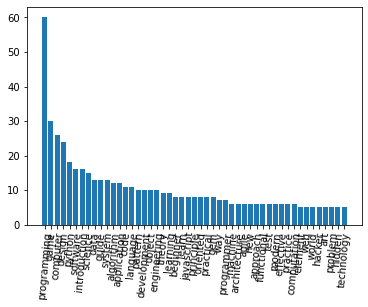

In [24]:
sorted_Keys = sorted(word_count, key = word_count.get, reverse = True) 
sorted_Values = sorted(word_count.values(), reverse = True) 
plt.bar(range(len(word_count)), sorted_Values, align = 'center') 
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation = '85') 
plt.show()

In [26]:
df['title'] = 0
tt = df.groupby('title', as_index = False)['title'].count() 
tt #출력하여 내용 확인

,title
0,271


NameError: name 'tt' is not defined

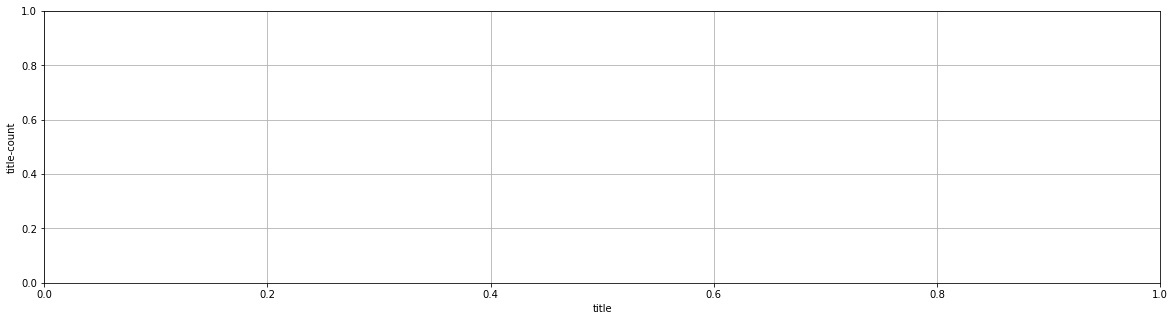

In [28]:
from matplotlib import font_manager
plt.figure(figsize = (20, 5))
plt.xlabel("title")
plt.ylabel("title-count")
plt.grid(True)
plt.plot(range(len(tt)), tt['genre_count']) 
plt.xticks(range(len(tt)), [text for text in tt['top genre']]) 
plt.show()

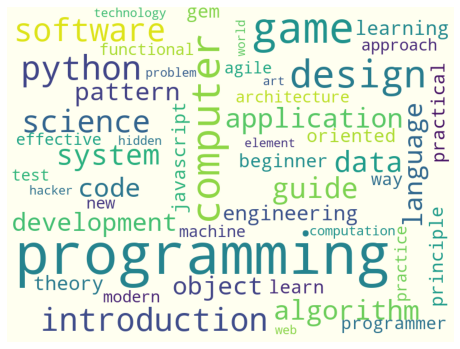

In [29]:
stopwords = set(STOPWORDS)
wc = WordCloud(background_color = 'ivory', stopwords = stopwords, width = 800, height = 600) 
cloud = wc.generate_from_frequencies(word_count)
plt.figure(figsize = (8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [30]:
cloud.to_file("book_title_wordCloud.jpg")